## 1. Download and Explore Dataset

In [1]:

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis 
import codecs
#!conda install -c conda-forge bs4 --yes # uncomment this line if you haven't completed the Foursquare API lab
from bs4 import BeautifulSoup
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


!wget https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
print("Done")


--2020-08-09 19:05:06--  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
Resolving en.wikipedia.org (en.wikipedia.org)... 208.80.154.224, 2620:0:861:ed1a::1
Connecting to en.wikipedia.org (en.wikipedia.org)|208.80.154.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56520 (55K) [text/html]
Saving to: ‘List_of_postal_codes_of_Canada:_M.9’

List_of_postal_code 100%[===================>]  55.20K  --.-KB/s    in 0.05s   

2020-08-09 19:05:06 (1.19 MB/s) - ‘List_of_postal_codes_of_Canada:_M.9’ saved [56520/56520]

Done


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:

f = codecs.open('List_of_postal_codes_of_Canada:_M', encoding='utf-8')
html = f.read()
soup = BeautifulSoup(html, 'html.parser')

df = (pd.read_html(str(soup.table))[0])

#drop the first row, which is the headings of the table
df.drop(axis=0, index=0, inplace=True)

#then assign the proper column names
column_names = ['Postcode', 'Borough', 'Neighborhood'] 
df.columns = column_names

#get rid of unassigned Boroughs
df = df[df['Borough'] != "Not assigned"].reset_index(drop=True) 
df


,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [4]:
na = df[df['Neighborhood']=="Not assigned"]
for index in range(len(na)):
    r = na.iloc[index]
    r['Neighborhood']=r['Borough']
    df.iloc[na.index[0]]['Neighborhood'] = r['Borough']

df.head(8)

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [5]:
aggregations = {
    'Neighborhood':lambda x:', '.join(x)}
g = df.groupby('Postcode').agg(aggregations).reset_index()
x = df.drop('Neighborhood',axis=1)
m = pd.merge(x, g, on='Postcode', how='left')
dd = m.drop_duplicates()
dd.to_csv("Toronto_Q1_Answer.csv", index=False)
dd # dd means dropped duplicates

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


## Q2

In [6]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)
geospatial_data.columns = ['Postcode', 'Latitude', 'Longitude']

In [7]:
geospatial_data.columns

Index(['Postcode', 'Latitude', 'Longitude'], dtype='object')

In [8]:
merged_data = pd.merge(df, geospatial_data, on='Postcode')

In [9]:
merged_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Q3

In [10]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


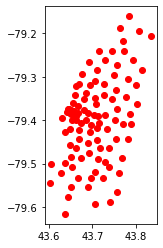

In [11]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')
# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()